In [46]:
#50 start_up data set

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [48]:
#Read the data
data = pd.read_csv("50_Startups.csv")
data.head()

,R_D,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R_D             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [50]:
#Convert the column into categorical columns
states=pd.get_dummies(data['State'],drop_first=True)

In [51]:
# Drop the state coulmn
data=data.drop('State',axis=1)

In [52]:
# concat the dummy variables
data=pd.concat([data,states],axis=1)

In [53]:
data

,R_D,Administration,Marketing,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


In [54]:
data.corr()

,R_D,Administration,Marketing,Profit,Florida,New York
R_D,1.000000,0.241955,0.724248,0.972900,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,0.010493,0.005145
Marketing,0.724248,-0.032154,1.000000,0.747766,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,0.116244,0.031368
Florida,0.105711,0.010493,0.205685,0.116244,1.000000,-0.492366
New York,0.039068,0.005145,-0.033670,0.031368,-0.492366,1.000000


<AxesSubplot:>

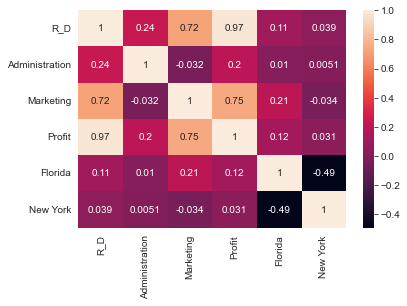

In [55]:
sns.heatmap(data.corr(),annot=True)

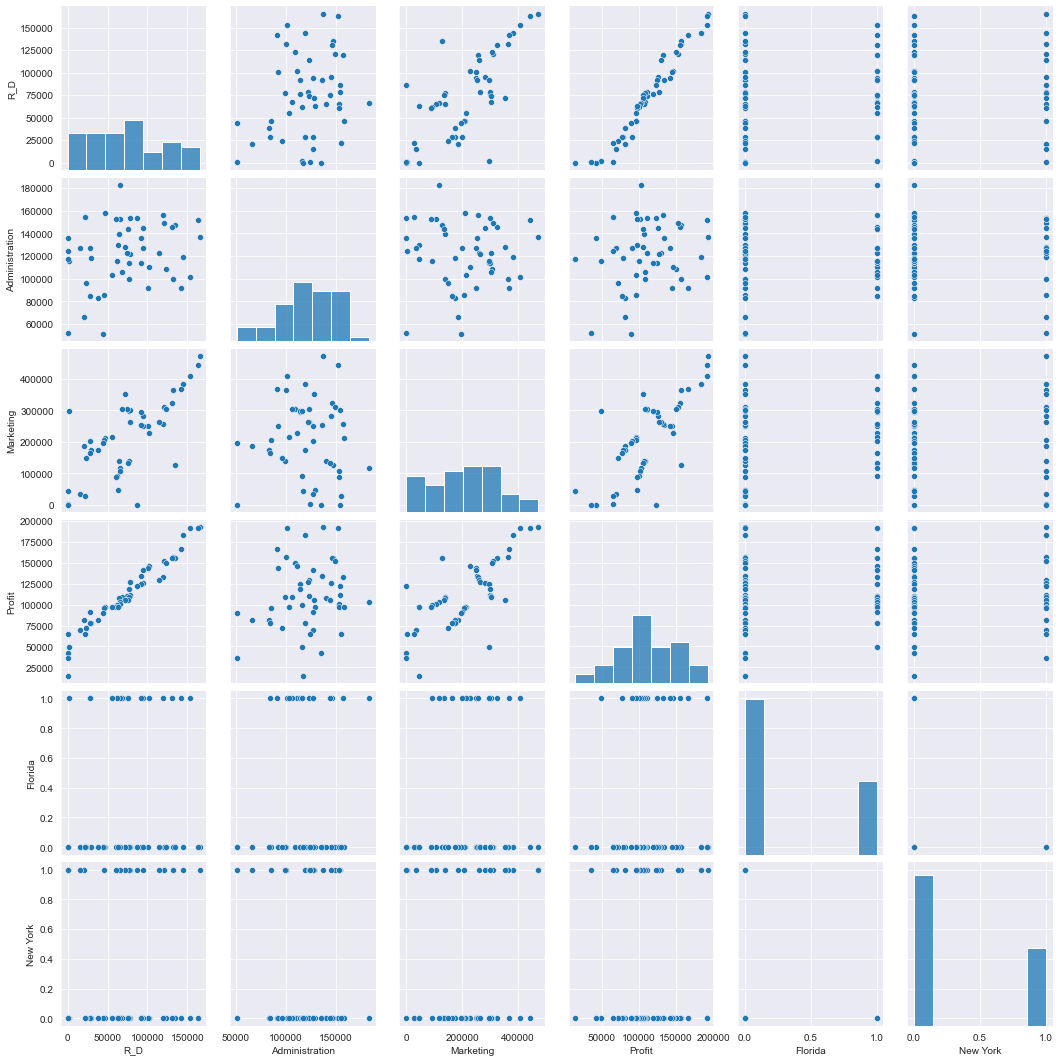

In [56]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [57]:
# Drop the state coulmn
data1= data=data.drop('Florida',axis=1)

In [58]:
data1 = data1.drop('New York',axis=1)

In [59]:
data1

,R_D,Administration,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [60]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~R_D+Administration+Marketing',data=data1).fit()

In [61]:
#Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           4.53e-30
Time:                        16:30:29   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_D                0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
rsq_rd = smf.ols('R_D~Administration+Marketing',data=data1).fit().rsquared  
vif_rd = 1/(1-rsq_rd) 

rsq_administration = smf.ols('Administration~R_D+Marketing',data=data1).fit().rsquared  
vif_administration= 1/(1-rsq_administration) 

rsq_marketing = smf.ols('Marketing~R_D+Administration',data=data1).fit().rsquared  
vif_marketing = 1/(1-rsq_marketing)

#rsq_sp = smf.ols('SP~WT+VOL+HP',data=data1).fit().rsquared  
#vif_sp = 1/(1-rsq_sp) 

# Storing vif values in a data frame
d1 = {'Variables':['RD','Administration','Marketing'],'VIF':[vif_rd,vif_administration,vif_marketing]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD,2.468903
1,Administration,1.175091
2,Marketing,2.326773


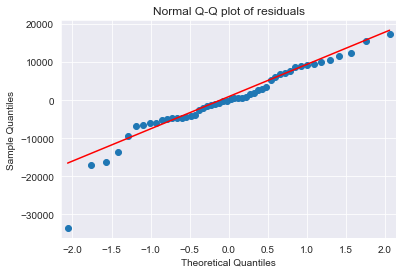

In [63]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [64]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [65]:
#Residual Plot for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

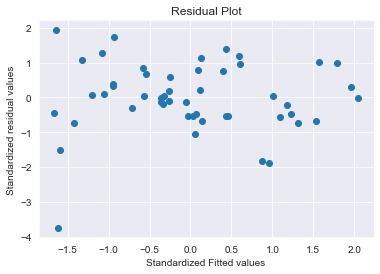

In [66]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


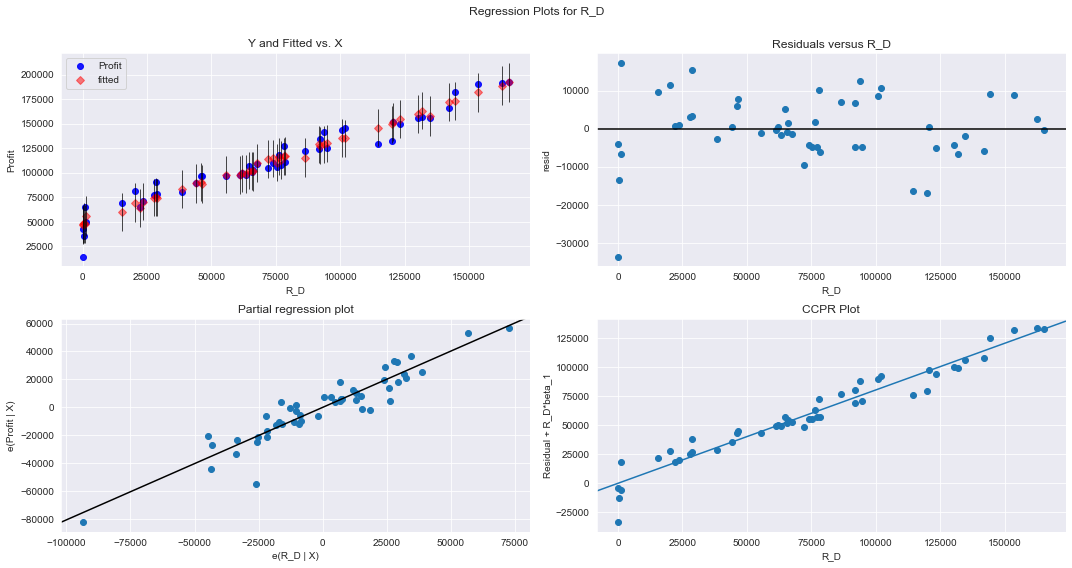

In [67]:
#Residual Vs Regressors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "R_D", fig=fig)
plt.show()

eval_env: 1


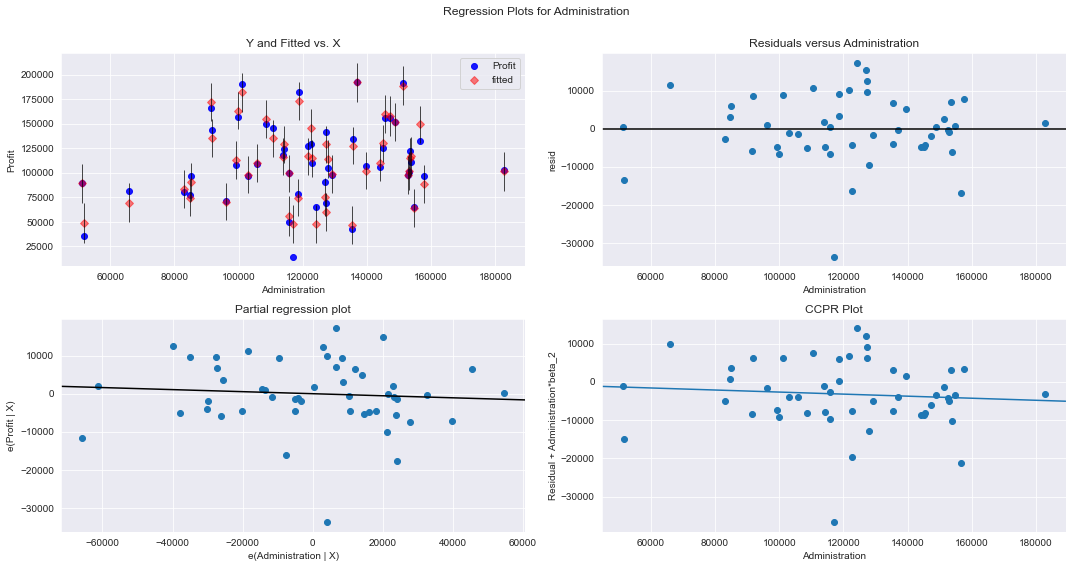

In [68]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


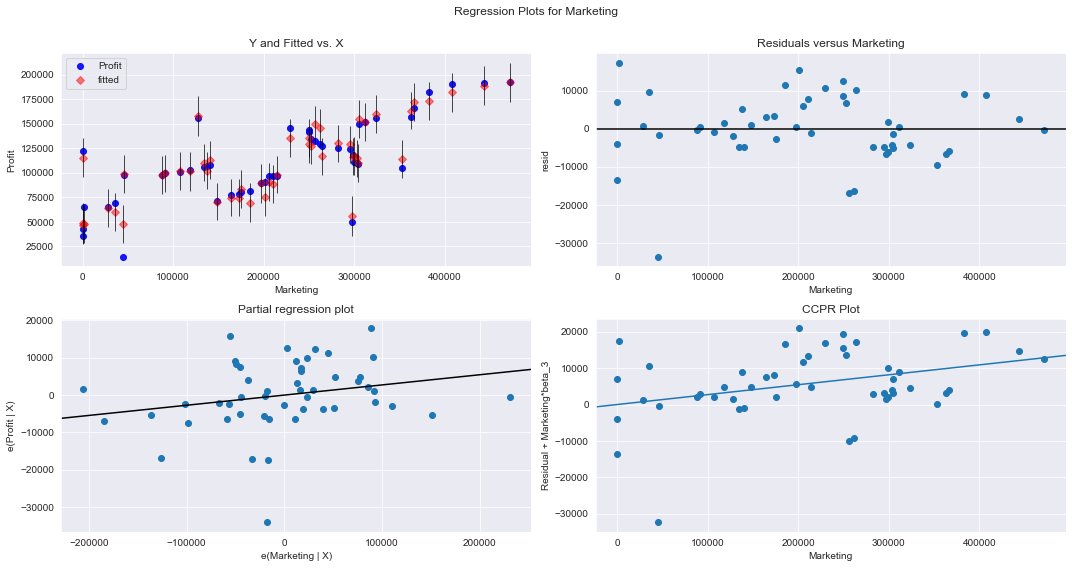

In [69]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing", fig=fig)
plt.show()

In [70]:
#Detecting Influencers/Outliers
#Cook’s Distance

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

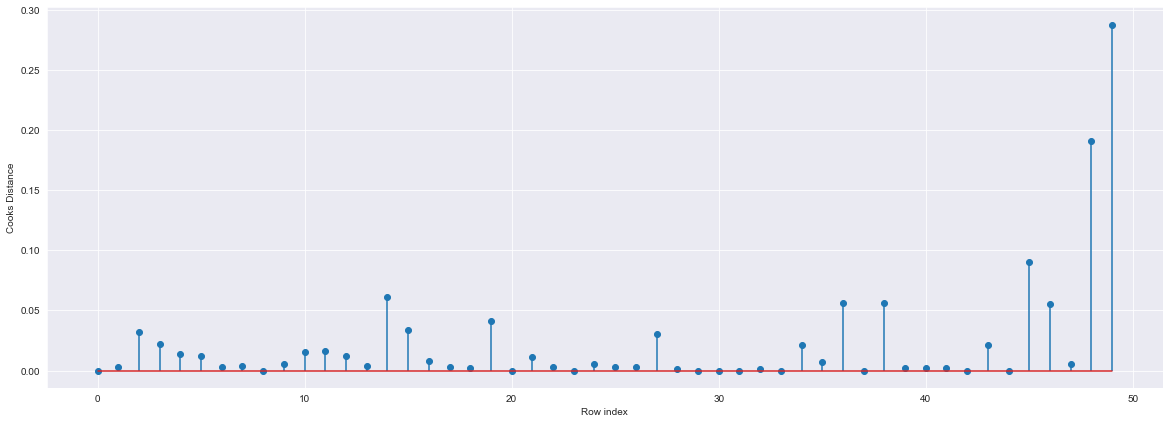

In [71]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [72]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

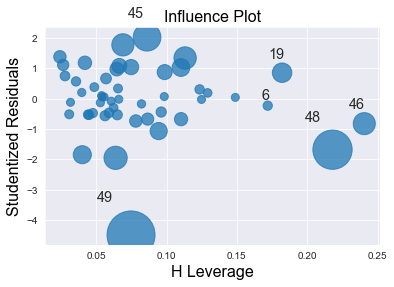

In [73]:
#High Influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [74]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [30]:
data[data.index.isin([49])]

,R_D,Administration,Marketing,Profit,New York
49,0.0,116983.8,45173.06,14681.4,0


In [31]:

data.head()

,R_D,Administration,Marketing,Profit,New York
0,165349.20,136897.80,471784.10,192261.83,1
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,0
3,144372.41,118671.85,383199.62,182901.99,1
4,142107.34,91391.77,366168.42,166187.94,0


In [32]:
#Improving the model

In [33]:
#Load the data
data_new = pd.read_csv("50_Startups.csv")

In [34]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data_new1=data_new.drop(data_new.index[[49]],axis=0).reset_index()

In [35]:
#Drop the original index
data_new1=data_new1.drop(['index'],axis=1)

In [36]:
data_new1

,R_D,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [37]:
# Build Model
#Exclude variable "States" and generate R-Squared and AIC values
final_ml_Profit= smf.ols('Profit~R_D+Administration+Marketing',data = data_new1).fit()

In [38]:
(final_ml_Profit.rsquared,final_ml_Profit.aic)

(0.9613162435129847, 1020.5652974526367)

In [39]:
model_influence_Profit = final_ml_Profit.get_influence()
(c_Profit, _) = model_influence_Profit.cooks_distance

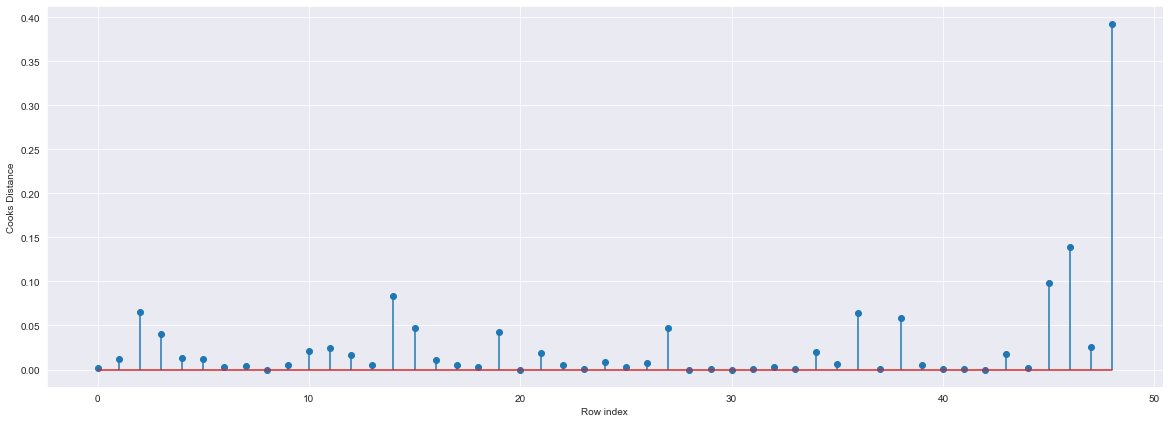

In [40]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_new1)),np.round(c_Profit,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [41]:
# Since the value is <1 , we can stop the diagnostic process and finalize the model

In [42]:
#Check the accuracy of the mode
final_ml_Profit1= smf.ols('Profit~R_D+Administration+Marketing',data = data_new4).fit()

NameError: name 'data_new4' is not defined

In [ ]:
(final_ml_Profit1.rsquared,final_ml_Profit1.aic)

In [ ]:
## Predicting for new data
#New data for prediction
new_data=pd.DataFrame({'R_D':134615,'Administration':127716,'Marketing':123498,'State':"Florida"},index=[1])

In [ ]:
final_ml_Profit1.predict(new_data)

In [43]:
final_ml_Profit.predict(data_new.iloc[0:5,])

0    190716.676999
1    187537.122227
2    180575.526396
3    172461.144642
4    170863.486721
dtype: float64

In [44]:
pred_y = final_ml_Profit.predict(data_new)

In [45]:
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
49     50925.119153
